In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import tensorflow as tf
%matplotlib inline

In [15]:
#Reading
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
#Looking at our data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

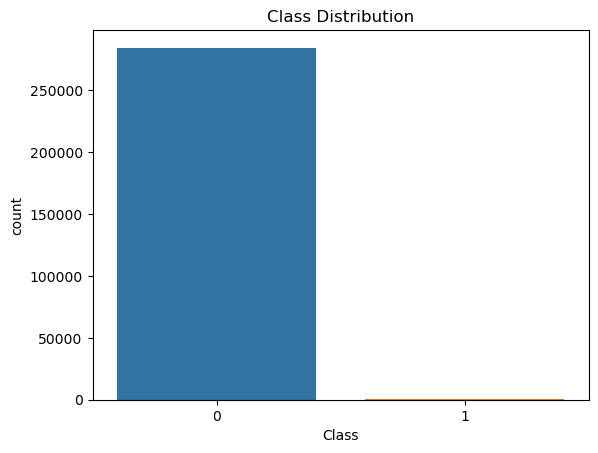

In [17]:
#Looking at our data
print(df.info())
print("Missing values:", df.isnull().sum())
# Check the distribution of the target variable ('Class' column)
print("Class distribution:\n", df['Class'].value_counts())
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

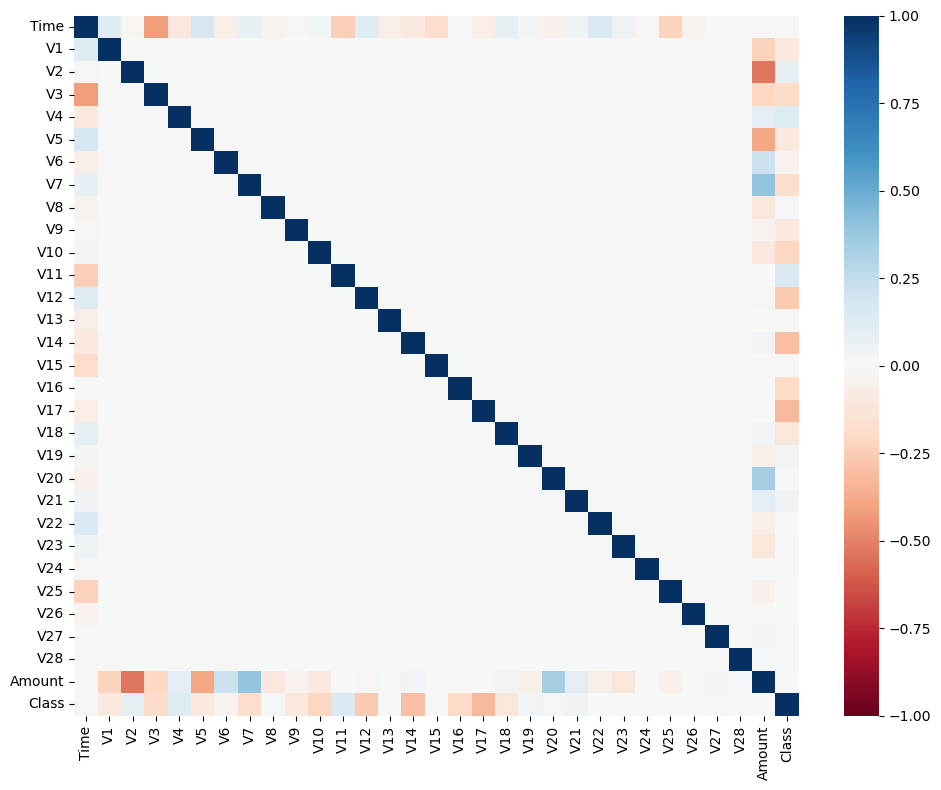

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()

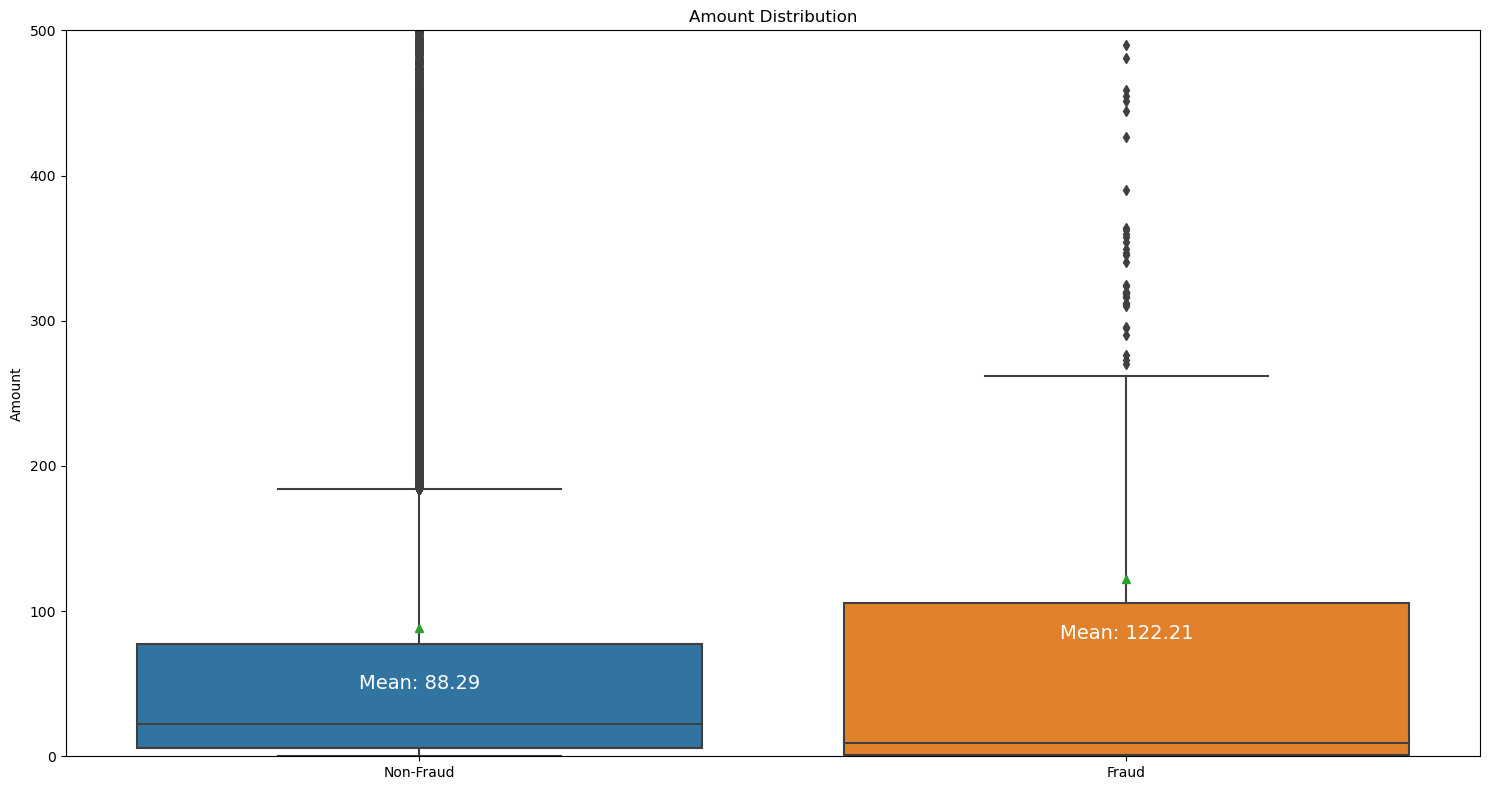

In [18]:
# Create a box plot with means
fig, ax = plt.subplots(figsize=(15, 8))
box_plot = sns.boxplot(x=df['Class'], y=df['Amount'], showmeans=True, ax=ax)

# Customize x-axis ticks and labels
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

# Set y-axis limits
ax.set_ylim(0, 500)

# Set plot title and x-axis label
ax.set_title('Amount Distribution')
ax.set_xlabel('')

# Calculate and display mean values
means = df.groupby(['Class'])['Amount'].mean()
vertical_offset = df['Amount'].mean() - 130

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, f'Mean: {round(means[xtick], 2)}', 
                  horizontalalignment='center', fontsize=14, color='w')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

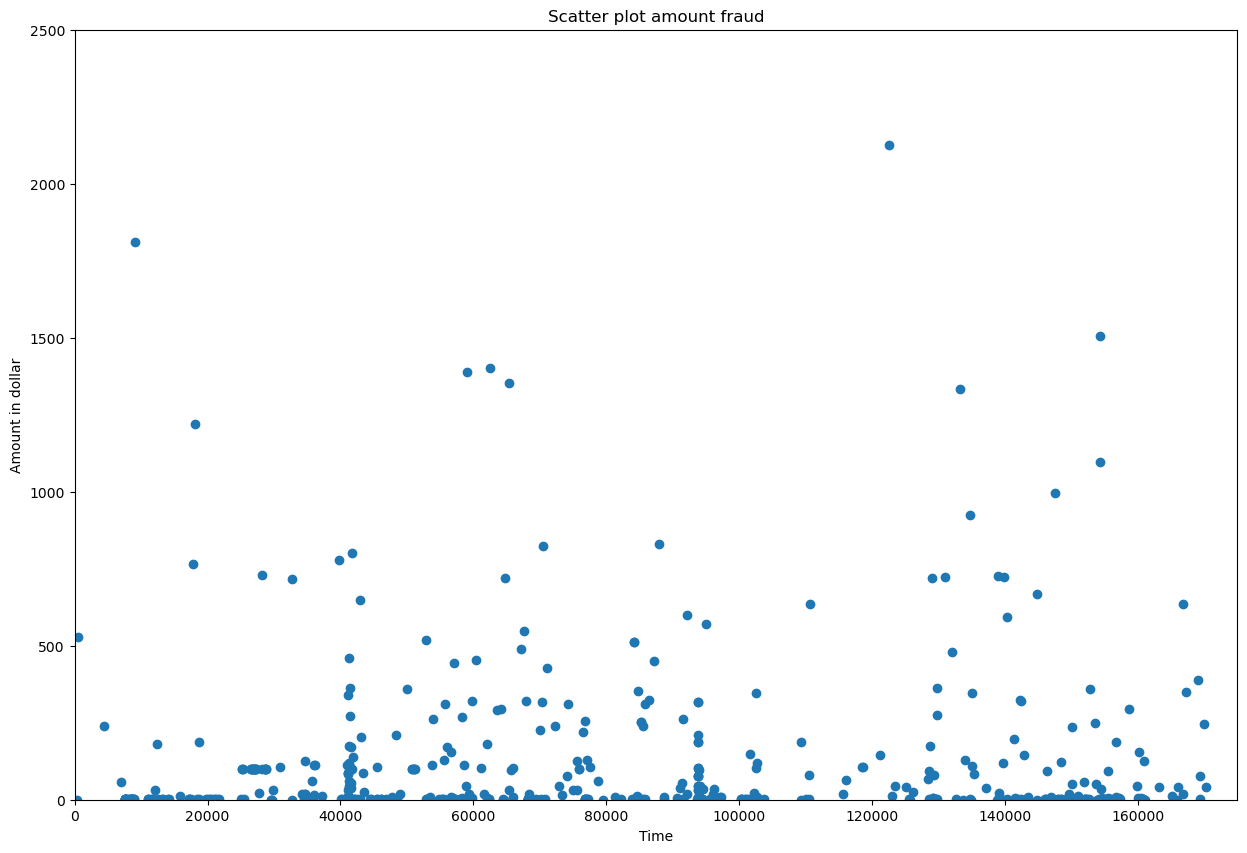

In [4]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scatter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount in dollar')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()


In [5]:
#Scaling the unscaled columns, which are Time & Amount

rbs = RobustScaler()

df_scaling = df[['Time','Amount']]
df_scaling = pd.DataFrame(rbs.fit_transform(df_scaling))

df_scaling.columns = ['scaled_time','scaled_amount']
df = pd.concat([df,df_scaling],axis=1)

df.drop(['Time','Amount'],axis=1,inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [6]:
#Counting Non fraud(0) & Fraud(1)
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Making Training data sets 
X = df.drop('Class',axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(len(X_train))
print(len(y_train))
a=y_train.value_counts()
print (a)

227845
227845
0    227451
1       394
Name: Class, dtype: int64


In [8]:
# NOT APPLYING DATA BALANCING 
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962




[[56855     9]
 [   41    57]]


accuracy is -->  99.91


/Users/monilakhadka/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#not applying data balancing 
# Making DecisionTree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.79      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962




[[56835    29]
 [   21    77]]


accuracy is -->  99.91


In [10]:
# not applying data balancing 
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier,IsolationForest

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

pred=rf.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

KeyboardInterrupt: 

In [13]:
#using SMOTE ONLY to training data

# from imblearn.over_sampling import SMOTE
# # Apply SMOTE to the training data
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# # Percentage of fraudulent records in the original data
# Source_data_no_fraud_count = len(df[df.Class==0])
# Source_data_fraud_count = len(df[df.Class==1])
# print('Percentage of fraud counts in the original dataset: {}%'.format((Source_data_fraud_count * 100) / (Source_data_no_fraud_count + Source_data_fraud_count)))

# # Percentage of fraudulent records in the resampled data
# Sampled_data_no_fraud_count = len(y_train_resampled[y_train_resampled==0])
# Sampled_data_fraud_count = len(y_train_resampled[y_train_resampled==1])

# print("Sampled no fraud count", Sampled_data_no_fraud_count)
# print("Sampled fraud count", Sampled_data_fraud_count)
# print('Percentage of fraud counts in the new data: {}%'.format((Sampled_data_fraud_count * 100) / (Sampled_data_no_fraud_count + Sampled_data_fraud_count)))


In [31]:
#Logistic Regression model # ONLY SMOTE
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Visualize the class distribution
# sns.countplot(x='Class', data=df)
# plt.title('Class Distribution')
# plt.show()


In [37]:
#ONLY SMOTE
#Logistic Regression model # ONLY SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

lr = LogisticRegression()
lr.fit(X_train_resampled,y_train_resampled)

pred = lr.predict(X_test)

# print(classification_report(y_test,pred))
# print('\n\n')
# print(confusion_matrix(y_test,pred))
# print('\n')
# print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
# print(len(X_train_resampled))
# print(len(y_train_resampled))
# a=y_train_resampled.value_counts()
# print (a)

# Create a DataFrame to store metrics for the 'fraud' class
log_smote = pd.DataFrame(index=['Fraud'], columns=['Precision', 'Recall', 'F1-Score', 'Accuracy'])

# Calculate and store metrics
precision_fraud = precision_score(y_test, pred, pos_label=1)
recall_fraud = recall_score(y_test, pred, pos_label=1)
f1_fraud = f1_score(y_test, pred, pos_label=1)
accuracy_fraud = accuracy_score(y_test, pred)

log_smote.loc['Fraud'] = [precision_fraud, recall_fraud, f1_fraud, accuracy_fraud]

# Display the metrics DataFrame
print("\nMetrics for Fraud Class:\n", log_smote)


Metrics for Fraud Class:
       Precision    Recall  F1-Score  Accuracy
Fraud  0.060788  0.928571  0.114107  0.975194


/Users/monilakhadka/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# SMOTE ONLY
# Making DecisionTree model 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)

pred = dt.predict(X_test)

# print(classification_report(y_test,pred))
# print('\n\n')
# print(confusion_matrix(y_test,pred))
# print('\n')
# print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

# Create a DataFrame to store metrics for the 'fraud' class
decision_smote = pd.DataFrame(index=['Fraud'], columns=['Precision', 'Recall', 'F1-Score', 'Accuracy'])

# Calculate and store metrics
precision_fraud = precision_score(y_test, pred, pos_label=1)
recall_fraud = recall_score(y_test, pred, pos_label=1)
f1_fraud = f1_score(y_test, pred, pos_label=1)
accuracy_fraud = accuracy_score(y_test, pred)

log_smote.loc['Fraud'] = [precision_fraud, recall_fraud, f1_fraud, accuracy_fraud]

# Display the metrics DataFrame
print("\nMetrics for Fraud Class:\n", log_smote)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.78      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.89      0.77     56962
weighted avg       1.00      1.00      1.00     56962




[[56761   103]
 [   22    76]]


accuracy is -->  99.78


In [14]:
# ONLY SMOTE
#Random Forestclassifier model 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier,IsolationForest

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_resampled,y_train_resampled)

pred=rf.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962




[[56852    12]
 [   15    83]]


accuracy is -->  99.95


In [7]:
#combining smote & randomundersampler
# logistic regression

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the pipeline with SMOTE and Random Under-sampling
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42))
])

# Apply the pipeline to the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

#Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_resampled,y_train_resampled)

pred = lr.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962




[[55458  1406]
 [    7    91]]


accuracy is -->  97.52


/Users/monilakhadka/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
#combining smote & randomundersampler
# Decision Tree

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the pipeline with SMOTE and Random Under-sampling
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42))
])

# Apply the pipeline to the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Making DecisionTree model ONLY SMOTE
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)

pred = dt.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.81      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962




[[56759   105]
 [   19    79]]


accuracy is -->  99.78


In [12]:
#combining smote & randomundersampler
# Random forest 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the pipeline with SMOTE and Random Under-sampling
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42))
])

# Apply the pipeline to the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)


#Random Forestclassifier model # ONLY SMOTE
from sklearn.ensemble import RandomForestClassifier,IsolationForest

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_resampled,y_train_resampled)

pred=rf.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962




[[56855     9]
 [   16    82]]


accuracy is -->  99.96


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
xgb.fit(X_train, y_train)
# Assuming X_test and y_test are your testing data
y_pred_xgb = xgb.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   22    76]]
